# 신용카드 사기 검출
### (Credit Card Fraud Detection)
#### 2013년 유럽 신용카드 사용자들의 이상 거래를 탐지하는 대회

## 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve
%matplotlib inline

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')
display(df.head())
display(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


- Time 기준
- V1~V28은 카드정보. 민감정보라 익명으로 나타내고 PCA 형식으로 수정

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- 결측값은 없다

0    284315
1       492
Name: Class, dtype: int64
0.173 %


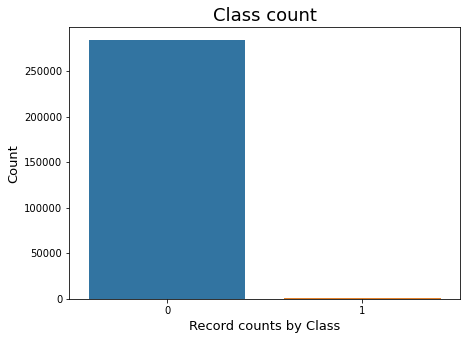

In [5]:
a = df['Class'].value_counts()
print(a)
print(round((a[1] / (a[0]+a[1]))*100, 3), '%')

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title('Class count', fontsize=18)
plt.xlabel('Record counts by Class', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

- 0 : 정상적인 신용카드 transaction
- 1 : 사기 transaction
- 1값의 비율이 0.173%로 데이터셋이 매우 불균형하다

,Frequency
0~1000,281738
1000~2000,2378
2000~3000,402
3000~4000,166
4000~5000,68
5000~6000,22
6000~7000,12
7000~8000,9
8000~9000,4
9000~10000,0


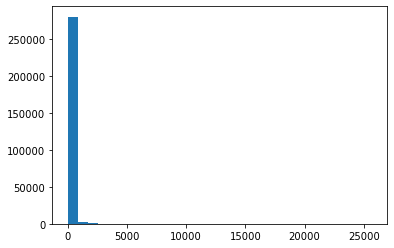

In [6]:
# 도수분포표
amount = df['Amount'].values
freq, tmp = np.histogram(amount, bins=30, range=(0, 30000))

freq_class = [str(i) + '~' + str(i+1000) for i in range(0, 30000, 1000)]
freq_dist_df = pd.DataFrame({'Frequency':freq},
                           index=freq_class)
display(freq_dist_df)

plt.hist(df['Amount'], bins=30)
plt.show()

- 0~1000달러 281,738건으로 주로 이 사이의 금액을 사용

## 2. training

#### 1) 가공 안한 데이터

In [7]:
df = pd.read_csv('creditcard.csv')

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사한 DataFrame반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split()으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                       test_size=0.3,
                                                       random_state=0,
                                                       stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


- 학습 데이터와 테스트 데이터의 레이블 값이 각각 비슷한 비율로 분할되었다

로지스틱 회귀

In [8]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]    # 개별 데이터별 예측확률 계산

# get_clf_eval()함수 이용해서 평가 수행
def get_clf_eval(y_test, pred, proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)     # 정밀도 계산
    recall = recall_score(y_test, pred)       # 재현율 계산
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC AUC 값: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_score))
    # print('pred_proba()결과 shape : {0}'.format(proba.shape))
    # print('pred_proba array에서 앞 3개만 샘플로 추출', '\n : ', proba[:3])
    
    # # 예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
    # proba_result = np.concatenate([proba, pred.reshape(-1, 1)].flatten(), axis=1)
    # print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', proba_result[:3])

# 로지스틱 회귀
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, ROC AUC 값: 0.9592


- 정밀도 88.12%에 비해 재현율 60.14%로 낮게 나옴

LGBM

In [11]:
# 인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, ROC AUC 값: 0.9790


- 재현율 75.68%, ROC-AUC 97.9%로 위의 값보다 높은 수치가 나옴

#### 2) amount 수정

In [12]:
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피쳐값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081, F1: 0.7143, ROC AUC 값: 0.9702
### LightGBM 예측 성능
오차 행렬
[[85266    29]
 [   93    55]]
정확도: 0.9986, 정밀도: 0.6548, 재현율: 0.3716, F1: 0.4741, ROC AUC 값: 0.6890


- 크게 개선되지 않음
- LGBM은 오히려 더 낮아짐

로그변환

In [13]:
# 로그변환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # numpy의 log1p()를 이용해 Amount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(df)

print('### 로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014, F1: 0.7149, ROC AUC 값: 0.9727
### LightGBM 예측 성능
오차 행렬
[[85221    74]
 [   91    57]]
정확도: 0.9981, 정밀도: 0.4351, 재현율: 0.3851, F1: 0.4086, ROC AUC 값: 0.6921


- 크게 개선되지 않음

#### 3) 이상치 처리

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V13,-0.065902,-2.425603e-17,6.295388e-16,2.807652e-16,1.303306e-16,5.886991e-16,-1.211182e-16,1.266462e-17,-2.921856e-16,2.251072e-15,...,1.008461e-16,6.747721e-17,-7.132064e-16,-1.397470e-16,-5.497612e-16,-1.769255e-16,-4.720898e-16,1.144372e-15,0.005293,-0.004570
V14,-0.098757,-5.020280e-16,-1.730566e-16,4.739859e-16,2.282280e-16,6.565143e-16,2.621312e-16,2.607772e-16,-8.599156e-16,3.784757e-15,...,-3.356561e-16,3.740383e-16,3.883204e-16,2.003482e-16,-8.547932e-16,-1.660327e-16,1.044274e-16,2.289427e-15,0.033751,-0.302544
V15,-0.183453,3.547782e-16,-4.995814e-17,9.068793e-16,1.377649e-16,-8.720275e-16,-1.531188e-15,-1.690540e-16,4.127777e-16,-1.051167e-15,...,6.605263e-17,-4.208921e-16,-3.912243e-16,-4.478263e-16,3.206423e-16,2.817791e-16,-1.143519e-15,-1.194130e-15,-0.002986,-0.004223
V16,0.011903,7.212815e-17,1.177316e-17,8.299445e-16,-9.614528e-16,2.246261e-15,2.623672e-18,5.869302e-17,-5.254741e-16,-1.214086e-15,...,-4.715090e-16,-7.923387e-17,5.020770e-16,-3.005985e-16,-1.345418e-15,-7.290010e-16,6.789513e-16,7.588849e-16,-0.003910,-0.196539
V17,-0.073297,-3.879840e-16,-2.685296e-16,7.614712e-16,-2.699612e-16,1.281914e-16,2.015618e-16,2.177192e-16,-2.269549e-16,1.113695e-15,...,-8.230527e-16,-8.743398e-16,3.706214e-16,-2.403828e-16,2.666806e-16,6.932833e-16,6.148525e-16,-5.534540e-17,0.007309,-0.326481
V18,0.090438,3.230206e-17,3.284605e-16,1.509897e-16,-5.103644e-16,5.308590e-16,1.223814e-16,7.604126e-17,-3.667974e-16,4.993240e-16,...,-9.408680e-16,-4.819365e-16,-1.912006e-16,-8.986916e-17,-6.629212e-17,2.990167e-16,2.242791e-16,7.976796e-16,0.035650,-0.111485
V19,0.028975,1.502024e-16,-7.118719e-18,3.463522e-16,-3.980557e-16,-1.450421e-16,-1.865597e-16,-1.881008e-16,-3.875186e-16,-1.376135e-16,...,5.115885e-16,-1.163768e-15,7.032035e-16,2.587708e-17,9.577163e-16,5.898033e-16,-2.959370e-16,-1.405379e-15,-0.056151,0.034783
V20,-0.050866,4.654551e-16,2.506675e-16,-9.316409e-16,-1.857247e-16,-3.554057e-16,-1.858755e-16,9.379684e-16,2.033737e-16,-2.343720e-16,...,-7.614597e-16,1.009285e-15,2.712885e-16,1.277215e-16,1.410054e-16,-2.803504e-16,-1.138829e-15,-2.436795e-16,0.339403,0.020090
V21,0.044736,-2.457409e-16,-8.480447e-17,5.706192e-17,-1.949553e-16,-3.920976e-16,5.833316e-17,-2.027779e-16,3.892798e-16,1.936953e-16,...,1.000000e+00,3.649908e-15,8.119580e-16,1.761054e-16,-1.686082e-16,-5.557329e-16,-1.211281e-15,5.278775e-16,0.105999,0.040413
V22,0.144059,-4.290944e-16,1.526333e-16,-1.133902e-15,-6.276051e-17,1.253751e-16,-4.705235e-19,-8.898922e-16,2.026927e-16,-7.071869e-16,...,3.649908e-15,1.000000e+00,-7.303916e-17,9.970809e-17,-5.018575e-16,-2.503187e-17,8.461337e-17,-6.627203e-16,-0.064801,0.000805


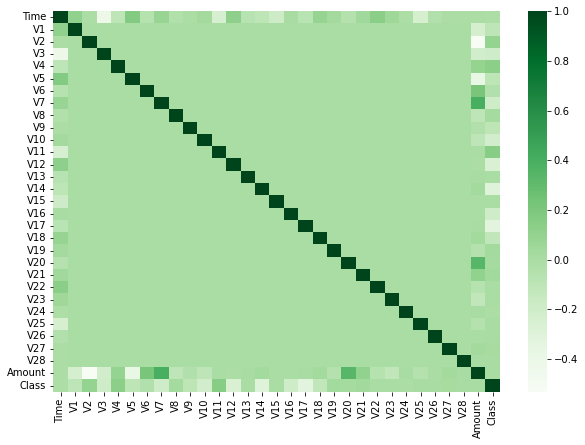

In [14]:
# 상관관계 분석
corr = df.corr()
display(corr.tail(18))
plt.figure(figsize=(10, 7))
sns.heatmap(corr, cmap='Greens')
plt.show()

- Class와 V17은 상관관계가 높다
- V17은 이상값이 나오지 않아서 책 예제와 같은 V14로 진행

<AxesSubplot:xlabel='Class', ylabel='V14'>

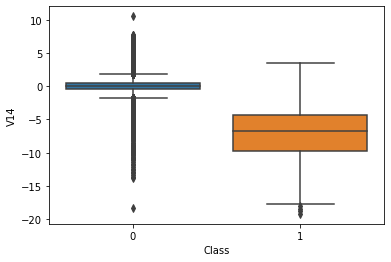

In [15]:
#box plot

sns.boxplot(x="Class", y="V14",
            data=df)

- V14은 target이 0, 1에서 서로 다른 분포를 보여준다 => target을 정할 수 있다, 영향력이 있다

<AxesSubplot:xlabel='Class', ylabel='V20'>

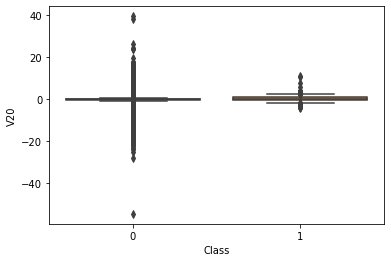

In [16]:
#box plot

sns.boxplot(x="Class", y="V20",
            data=df)

- V20은 target이 0, 1 일 때 분포가 비슷하다 => target을 정할 수 없음

In [17]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4  분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최대값과 최소값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값보다 크거나, 최소값보다 작은 값을 이상치 데이터로 설정. DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

outlier_index = get_outlier(df=df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [18]:
# get_processed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy


X_train, X_test, y_train, y_test = get_train_test_dataset(df)

print('### 로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train,
                    tgt_test=y_test)

print('### LightGBM 예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712, F1: 0.7597, ROC AUC 값: 0.9743
### LightGBM 예측 성능
오차 행렬
[[85268    27]
 [   36   110]]
정확도: 0.9993, 정밀도: 0.8029, 재현율: 0.7534, F1: 0.7774, ROC AUC 값: 0.9219


- 크게 개선되지 않음

### SMOTE Over Sampling

In [19]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포:
 0    199020
1    199020
Name: Class, dtype: int64


- 학습용 데이터만 오버샘플링 => 테스트 데이터까지 오버샘플링하면 원본이 아닌 다른 데이터셋에서 테스트 수행하기 때문
- fit_resample을 이용하여 데이터 증식 (199362 => 398040)
- 학습용 데이터셋 분포가 동일하게 생성 (199020건)

In [20]:
# 로지스틱 회귀
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247, F1: 0.1023, ROC AUC 값: 0.9737


- 재현율은 92.47%로 크게 증가
- 정밀도는 5.42%로 크게 감소

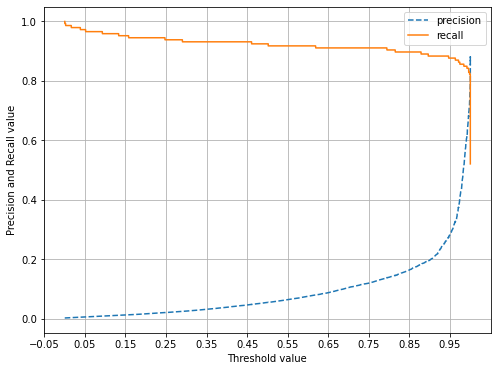

In [21]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--',
            label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

In [22]:
#LightGBM
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493, F1: 0.8794, ROC AUC 값: 0.9814


-

### Under Sampling

In [23]:
# seperating the data for analysis
legit = df[df.Class==0]
fraud = df[df.Class==1]

print(legit.shape)
print(fraud.shape)


(284315, 31)
(492, 31)


In [26]:
legit_sample = legit.sample(n=492)
new_df = pd.concat([legit_sample, fraud], axis=0)
display(new_df.head())
display(new_df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
145380,86893.0,1.957622,-0.398628,-2.076347,0.184397,0.543604,-0.365113,0.329879,-0.122654,0.364033,...,0.000697,-0.086969,-0.008958,0.216840,0.162251,0.537755,-0.129244,-0.076339,74.99,0
86788,61395.0,1.224883,-1.256700,1.335269,-0.483719,-1.673398,0.883255,-1.747729,0.574280,0.521696,...,0.218723,0.768911,-0.092119,-0.299037,0.308434,-0.034701,0.073648,0.009940,23.05,0
244575,152407.0,-1.337483,1.571356,-0.371266,-0.689817,0.334334,-0.145739,0.280048,0.763778,-0.705468,...,-0.023300,-0.547756,-0.061487,0.280098,-0.092835,-0.590468,-0.552300,0.004404,11.85,0
200649,133516.0,2.154424,-0.399707,-2.105263,-0.804646,0.227205,-1.130039,0.271462,-0.291957,1.198204,...,-0.086357,-0.139718,0.088932,0.504564,0.156680,0.717521,-0.126808,-0.081780,9.00,0
276178,166942.0,-1.138483,-0.204893,3.573909,5.034916,-0.764174,2.002115,-0.637616,0.456850,0.154676,...,0.037466,0.609566,-0.082159,-0.118906,0.100725,0.639188,-0.092232,-0.059205,126.05,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [27]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [29]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

print('### 로지스틱 회귀 예측 성능')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=Y_train,
                    tgt_test=Y_test)

print('### LightGBM 예측 성능')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test,
                     tgt_train=Y_train, tgt_test=Y_test)

(984, 30) (787, 30) (197, 30)
### 로지스틱 회귀 예측 성능
오차 행렬
[[94  5]
 [15 83]]
정확도: 0.8985, 정밀도: 0.9432, 재현율: 0.8469, F1: 0.8925, ROC AUC 값: 0.9631
### LightGBM 예측 성능
오차 행렬
[[96  3]
 [12 86]]
정확도: 0.9239, 정밀도: 0.9663, 재현율: 0.8776, F1: 0.9198, ROC AUC 값: 0.9747


- 로지스틱 회귀와 LGBM 모두 정확도가 많이 떨어짐

## 3. 결과